## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. #



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:

import pandas as pd
df= pd.read_csv('amz_uk_price_prediction_dataset.csv')


In [9]:
df.shape

(2443651, 9)

In [13]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [37]:
categories_freq = df['category'].value_counts().sort_values(ascending=False)
categories_freq


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [40]:
top5_cat = categories_freq.nlargest(5)
top5_cat

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

#**Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

[Text(0.5, 1.0, 'Top Categories of Products'),
 Text(0.5, 0, 'Product category'),
 Text(0, 0.5, 'count')]

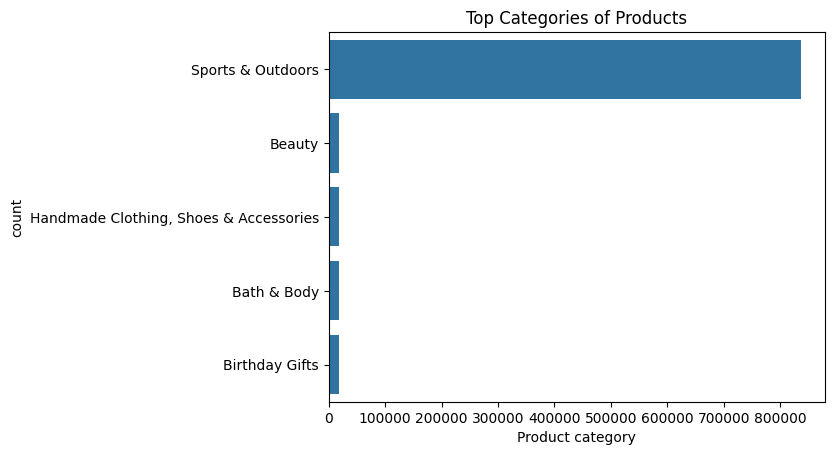

In [71]:
bar = sns.barplot(data=top5_cat, orient="h")
bar.set(title = "Top Categories of Products", xlabel='Product category', ylabel='count')

In [ ]:
# ax = sns.boxplot(data=df, x='TotRmsAbvGrd', y='SalePrice_category',palette="Set3")
#ax.set_title('Box Plot of Win')
#ax.set_xlabel('Total Rooms')
#ax.set_ylabel('Sale Price')
# or
# ax.set(title = 'Box Plot', xlabel = 'Total Rooms', ylabel ='Sale Price')
# ax.plot()


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [56]:
null_price = df["price"].isnull().sum()
null_price

0

In [6]:
mean = df["price"].mean().round(2)
median = df["price"].median().round(2)
mode= df["price"].mode()[0].round(2)
print(f'Price of products: \n mean: {mean} \n median: {median} \n mode: {mode}') 

#     - What's the average price point of products listed? How does this compare with the most common price point (mode)?
# the average is 89.24, much higher than the most common value 9.99

Price of products: 
 mean: 89.24 
 median: 19.09 
 mode: 9.99


In [73]:
# 2. **Measures of Dispersion**:
    # - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    # - How varied are the product prices? Are there any indicators of a significant spread in prices?

df["price"].var()

119445.48532254907

In [74]:
df["price"].std()

345.60886175349884

In [79]:
df['price'].quantile(0.25)

9.99

In [80]:
df['price'].quantile(0.5)

19.09

In [81]:
df['price'].quantile(0.75)

45.99

In [82]:
df['price'].max()

100000.0

In [ ]:
# - How varied are the product prices? Are there any indicators of a significant spread in prices?
# prices are very spread. it looks like there are some outliers , the standard deviation is very high comparing to the mean and median. there is a significant spread to the right

In [ ]:
3. # **Visualizations**:
    # - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    # - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price'>

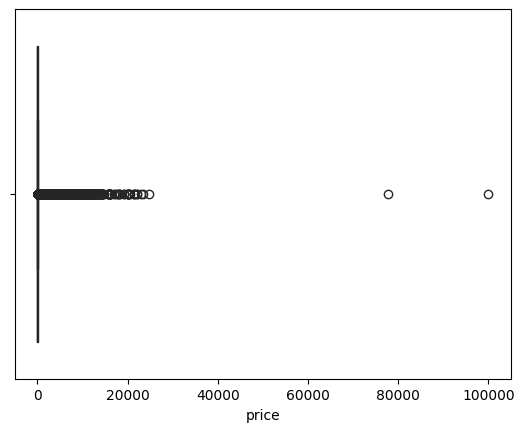

In [12]:
sns.boxplot(data= df['price'], color="purple", orient='h')

<Axes: xlabel='price', ylabel='Count'>

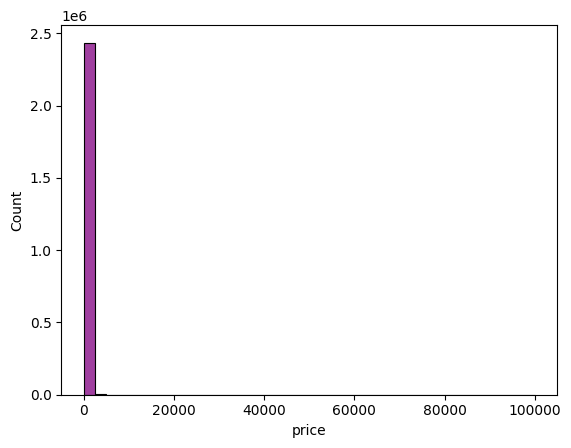

In [7]:
sns.histplot(data= df['price'], bins=40, color="purple")


In [8]:
import matplotlib.pyplot as plt

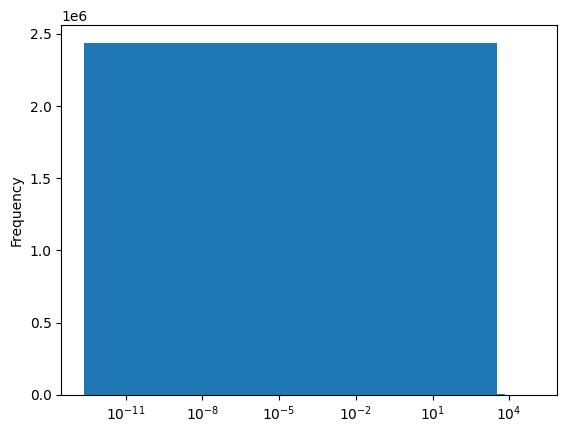

In [9]:
df['price'].plot.hist(bins=30)
plt.xscale('log')
plt.show()


In [10]:
bins = [0, 10, 100, 1000, 10000, df['price'].max()]
labels = ['0-10', '11-100', '101-1000', '1001-10000', '10000 - 100000']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)


In [18]:
price_category_counts = df['price_category'].value_counts()
price_category_counts

price_category
11-100            1482978
0-10               633419
101-1000           288140
1001-10000          38947
10000 - 100000        167
Name: count, dtype: int64

<Axes: xlabel='price_category', ylabel='count'>

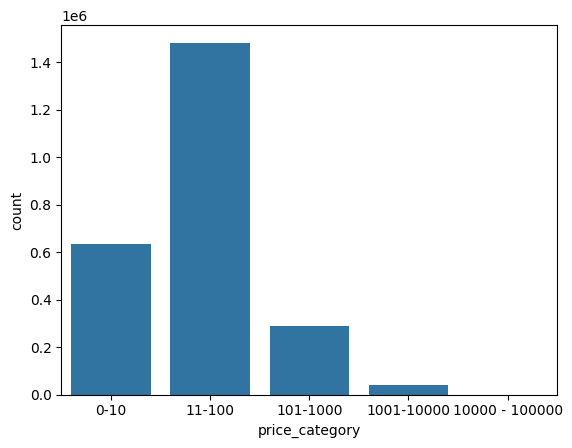

In [19]:
sns.barplot(price_category_counts)


KeyboardInterrupt: 

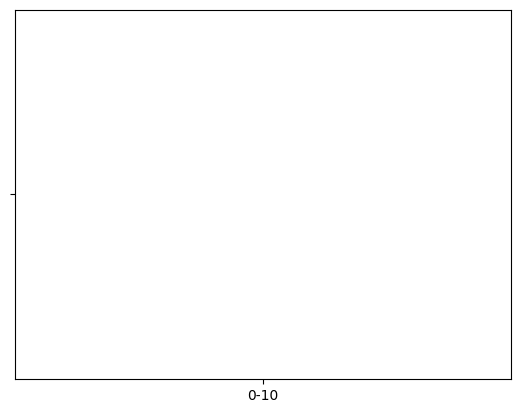

In [20]:

ax = sns.barplot(x="price_category", data=df)